In [ ]:
import torch

In [ ]:
tensor_a = torch.tensor([[1, 2, 3],
                         [4, 5, 6],
                         [7, 8, 9]])

print("Original Tensor:\n", tensor_a)

Original Tensor:
 tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [ ]:
reshaped_tensor = tensor_a.view(1, 9)
print("Reshaped Tensor (1x9):\n", reshaped_tensor)

Reshaped Tensor (1x9):
 tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]])


In [ ]:
print("Element at (1,2):", tensor_a[1, 2])
print("First row:", tensor_a[0])
print("Second column:", tensor_a[:, 1])

Element at (1,2): tensor(6)
First row: tensor([1, 2, 3])
Second column: tensor([2, 5, 8])


In [ ]:
tensor_b = torch.tensor([[9, 8, 7],
                         [6, 5, 4],
                         [3, 2, 1]])

sum_tensor = tensor_a + tensor_b
print("Element-wise Sum:\n", sum_tensor)

product_tensor = tensor_a * tensor_b
print("Element-wise Product:\n", product_tensor)

Element-wise Sum:
 tensor([[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]])
Element-wise Product:
 tensor([[ 9, 16, 21],
        [24, 25, 24],
        [21, 16,  9]])


In [ ]:
transposed = tensor_a.t()
print("Transposed Tensor:\n", transposed)

Transposed Tensor:
 tensor([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]])


In [ ]:
concatenated = torch.cat((tensor_a, tensor_b), dim=0)
print("Concatenated Tensor (dim=0):\n", concatenated)

Concatenated Tensor (dim=0):
 tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
        [9, 8, 7],
        [6, 5, 4],
        [3, 2, 1]])


In [ ]:
mean_val = torch.mean(tensor_a.float())
max_val = torch.max(tensor_a)
stacked = torch.stack((tensor_a, tensor_b), dim=0)

print("\nMean of Tensor A:", mean_val.item())
print("Max of Tensor A:", max_val.item())
print("Stacked Tensor:\n", stacked)


Mean of Tensor A: 5.0
Max of Tensor A: 9
Stacked Tensor:
 tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[9, 8, 7],
         [6, 5, 4],
         [3, 2, 1]]])


In [ ]:
vector_data = torch.tensor([10, 20, 30, 40, 50])
print("\nVector Data:\n", vector_data)


Vector Data:
 tensor([10, 20, 30, 40, 50])


In [ ]:
time_series_data = torch.tensor([[1.1, 2.2],
                                 [2.3, 3.4],
                                 [3.5, 4.6],
                                 [4.7, 5.8]])
print("\nTime-series Data:\n", time_series_data)


Time-series Data:
 tensor([[1.1000, 2.2000],
        [2.3000, 3.4000],
        [3.5000, 4.6000],
        [4.7000, 5.8000]])


In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
import torch as t
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris(as_frame=True)
df = iris.frame
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [ ]:
X = df.drop('target', axis=1).values
y = df['target'].values

In [ ]:
X_tensor = t.tensor(X, dtype=t.float32)
y_tensor = t.tensor(y, dtype=t.long)

In [ ]:

print("Feature tensor shape:", X_tensor.shape)
print("Label tensor shape:", y_tensor.shape)

Feature tensor shape: torch.Size([150, 4])
Label tensor shape: torch.Size([150])


In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from PIL import Image

In [ ]:
image_path = '/content/drive/MyDrive/mountain.jpg'
image = Image.open(image_path)

In [ ]:
transform = transforms.ToTensor()
image_tensor = transform(image)

In [ ]:
print("Image Tensor Shape:", image_tensor.shape)

Image Tensor Shape: torch.Size([3, 853, 1280])


In [ ]:
image_numpy = image_tensor.permute(1, 2, 0).numpy()

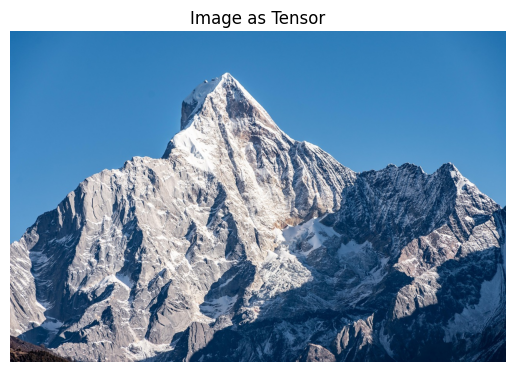

In [ ]:
plt.imshow(image_numpy)
plt.title("Image as Tensor")
plt.axis('off')
plt.show()

Video loaded, total frames: 82
Frame shape: (850, 478, 3)


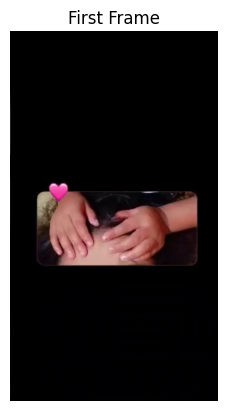

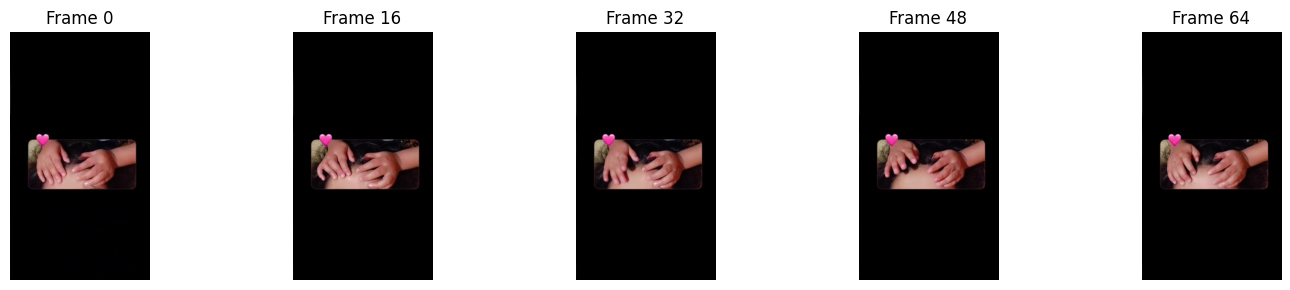

In [ ]:
import cv2
import matplotlib.pyplot as plt

video_path = '/content/drive/MyDrive/veera.mp4'

# Open video
cap = cv2.VideoCapture(video_path)

frames = []
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    frames.append(frame)
cap.release()

print("Video loaded, total frames:", len(frames))
print("Frame shape:", frames[0].shape)

# Show first frame
plt.imshow(frames[0])
plt.title("First Frame")
plt.axis('off')
plt.show()

# Show 5 sample frames
num_frames_to_show = 5
frame_gap = max(1, len(frames) // num_frames_to_show)
plt.figure(figsize=(15, 3))

for i in range(num_frames_to_show):
    frame_index = i * frame_gap
    plt.subplot(1, num_frames_to_show, i + 1)
    plt.imshow(frames[frame_index])
    plt.title(f"Frame {frame_index}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

### 1. Load and Preprocess the MNIST Dataset

We'll load the MNIST dataset, convert the images to tensors, and normalize them. The images will be treated as sequences for the RNN.

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
sequence_length = 28 # MNIST image height
input_size = 28      # MNIST image width (features per step)
hidden_size = 128
num_layers = 2
num_classes = 10
batch_size = 100
num_epochs = 2
learning_rate = 0.01

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

### 2. Define the RNN Model

We'll create a simple RNN model with a linear layer at the end for classification.

In [ ]:
# Recurrent neural network (many-to-one)
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # Set initial hidden and cell states
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        # Forward propagate RNN
        out, _ = self.rnn(x, h0)

        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out

model = RNN(input_size, hidden_size, num_layers, num_classes).to(device)

### 3. Loss and Optimizer

We'll use CrossEntropyLoss for classification and Adam optimizer.

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### 4. Train the Model

The model will be trained for a specified number of epochs.

In [ ]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

### 5. Evaluate the Model

Finally, we'll evaluate the model's accuracy on the test dataset.

In [ ]:
# Test the model
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

In [ ]:
vector = torch.tensor([3, 1, 4, 1, 5, 9, 2, 6], dtype=torch.float32)

In [ ]:
print("Tensor shape:", vector.shape)
print("Tensor:\n", vector)

Tensor shape: torch.Size([8])
Tensor:
 tensor([3., 1., 4., 1., 5., 9., 2., 6.])


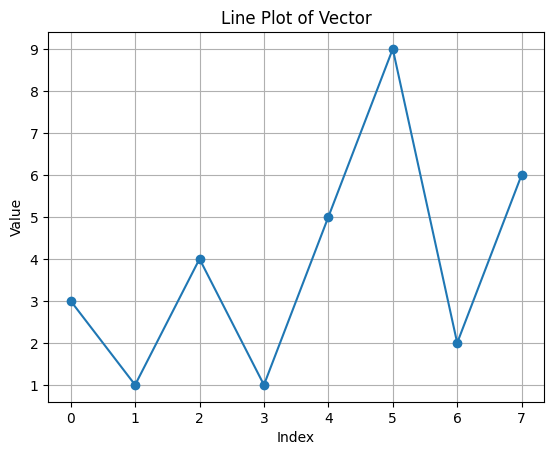

In [ ]:
plt.plot(vector.numpy(), marker='o')
plt.title("Line Plot of Vector")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()

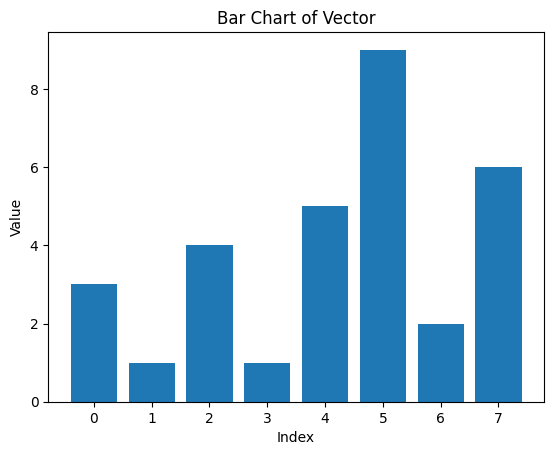

In [ ]:
plt.bar(torch.arange(len(vector)).numpy(), vector.numpy())
plt.title("Bar Chart of Vector")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

In [ ]:
import torch
import matplotlib.pyplot as plt

In [ ]:
time = torch.arange(0, 10)
temperature = torch.tensor([28.0, 28.5, 29.2, 29.0, 29.4, 30.0, 30.2, 29.9, 30.5, 30.8])

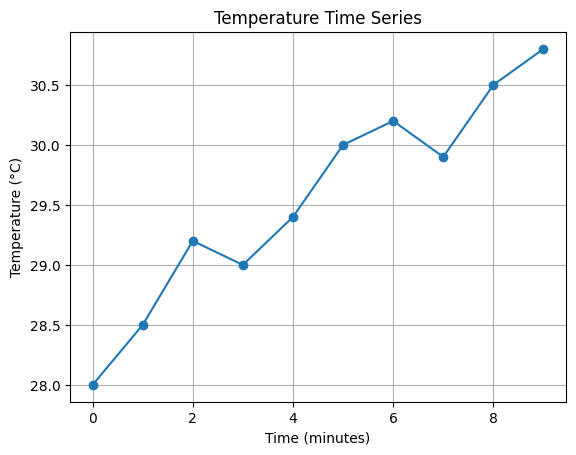

In [ ]:
plt.plot(time.numpy(), temperature.numpy(), marker='o')
plt.title("Temperature Time Series")
plt.xlabel("Time (minutes)")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()